# [2] Projection onto Eigenvectors
This notebook is simply to look at our eigenvector/value information and mostly consists of using code from MP1 to look at the vectors although it is important to note that the projection code has been significantly improved. This also was to check that data that wasn't included in the training sets used to create the eigenvectors would still project well onto them.

In [2]:
## Importing libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random

In [2]:
# loading in important variables
###############################################################
# CHOOSE SIDE, BELOW, OR CONCAT TO SET THE SET YOU WANT TO VIEW
###############################################################

img_types = ["side", "below", "concat"]
img_type = img_types[2] # viewing concat images

# Vectors and Values
with open(f'train_{img_type}_vals.npy', 'rb') as f:
    values = pickle.load(f)
with open(f'train_{img_type}_vectors.npy', 'rb') as f:
    vectors = pickle.load(f) 

# Keys
with open('OFFICIAL_keys.pkl', 'rb') as f:
    keys = pickle.load(f)
train_set = keys[:int(0.8*len(keys))]
test_set = keys[int(0.8*len(keys)):int(0.9*len(keys))+1]
validation_set = keys[int(0.9*len(keys))+1:]

# Images
with open(f'{img_type}_imgs.npy', 'rb') as f:
    imgs_full = pickle.load(f)
train_imgs = imgs_full[train_set]
test_imgs = imgs_full[test_set]

# Scale
scale = (162, 135)
if img_type == "concat":
    scale = (scale[0]*2, scale[1])


Text(0, 0.5, 'Eigenvalue')

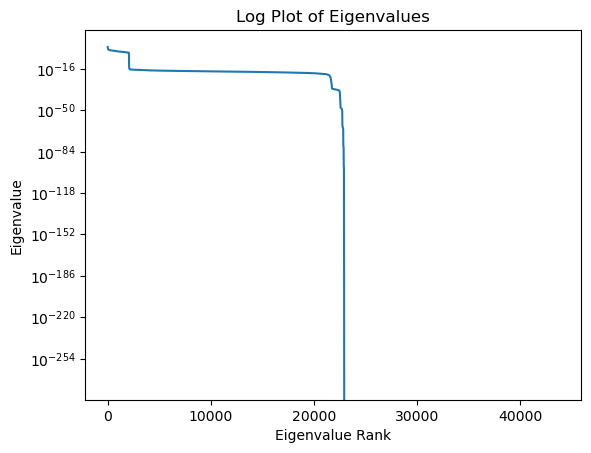

In [10]:
# Plot eigenvalues in decreasing order using plt.plot()
plt.figure()
plt.plot(values)
plt.yscale('log')
plt.title('Log Plot of Eigenvalues')
plt.xlabel('Eigenvalue Rank')
plt.ylabel('Eigenvalue')

(43740, 43740)


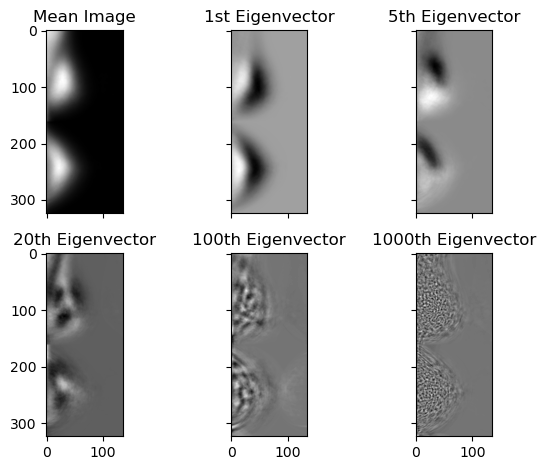

In [4]:
# TODO - Plot eigenvectors here. Fill in the first argument to plt.imshow() in each case.
# NOTE - Eigenvectors can be plotted as a 128x128 image
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

print(vectors.shape)
axs[0,0].set_title('Mean Image')
axs[0,0].imshow(np.reshape(np.mean(train_imgs, axis=0), scale), cmap='gray')

axs[0,1].set_title('1st Eigenvector')
axs[0,1].imshow(np.reshape(vectors[0], scale), cmap='gray')

axs[0,2].set_title('5th Eigenvector')
axs[0,2].imshow(np.reshape(vectors[4], scale), cmap='gray')

axs[1,0].set_title('20th Eigenvector')
axs[1,0].imshow(np.reshape(vectors[19], scale), cmap='gray')

axs[1,1].set_title('100th Eigenvector')
axs[1,1].imshow(np.reshape(vectors[99], scale), cmap='gray')

axs[1,2].set_title('1000th Eigenvector')
axs[1,2].imshow(np.reshape(vectors[999], scale), cmap='gray')

plt.tight_layout()
plt.show()

In [5]:
## Takes flattened images (as a numpy array, image length n), eigenvectors for the set, and k = new dimensionality
## Returns an array similar to flattened images array but with k instead of n dimensions
def reduce_dimensionality(imgs, vecs, k):
    reduced_dim = np.matmul(vecs[:k], imgs)
    return reduced_dim

## Converts the reduced dimension scan back to original image dimension
def reduced_to_img(reduced, vecs):
    approx = np.matmul(vecs[:reduced.shape[0]].T, reduced)
    return approx

## Combined the above two functions for convenience in creating downscaled images
def reduce_img_dim(imgs, vecs, k):
    return reduced_to_img(reduce_dimensionality(imgs, vecs, k), vecs)

## Helper function for plotting images below
def plot_imgs(num_imgs, images, suptitle=''):
    fig, axs = plt.subplots(1, num_imgs, figsize=(15,15))
    print(suptitle)
    for i in range(num_imgs):
        axs[i].imshow(images[i,:,:], cmap='gray')
    plt.show()    
    return

Original Images


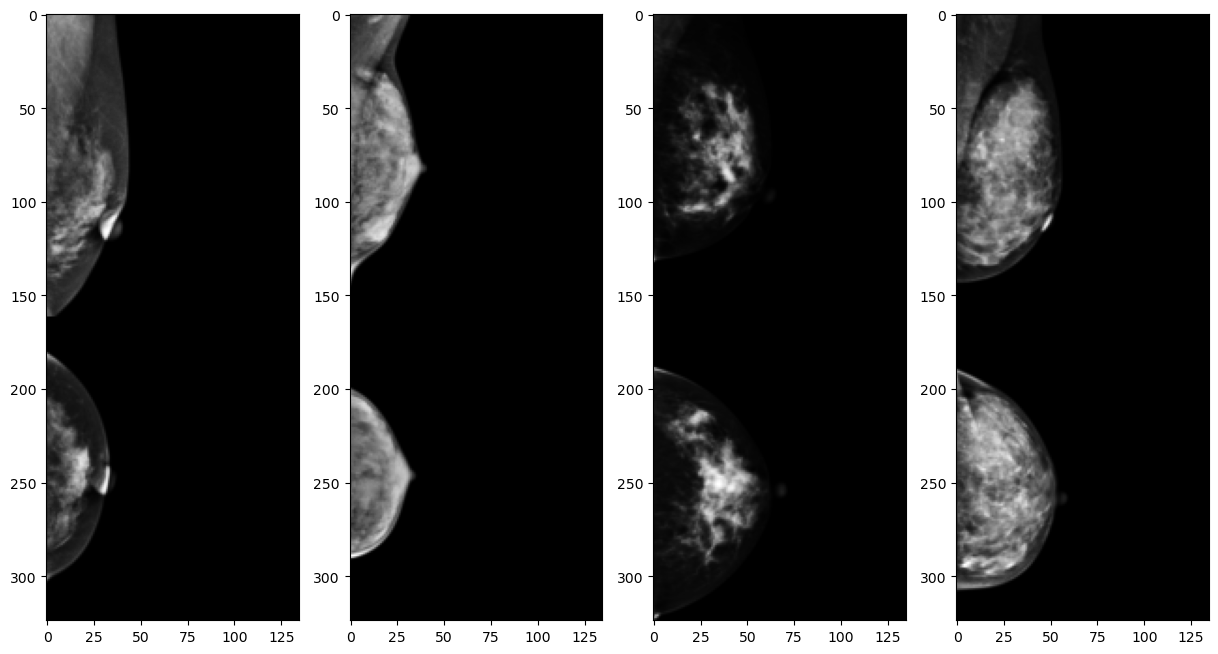

Number of Eigenvector Components: 100


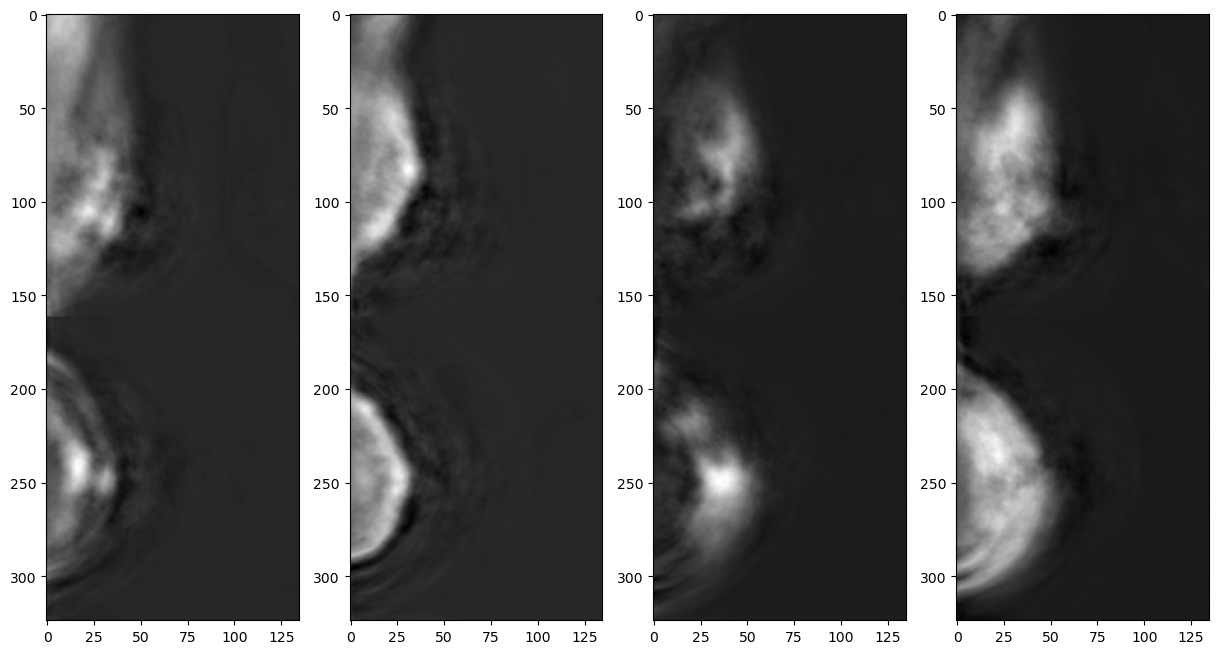

Number of Eigenvector Components: 500


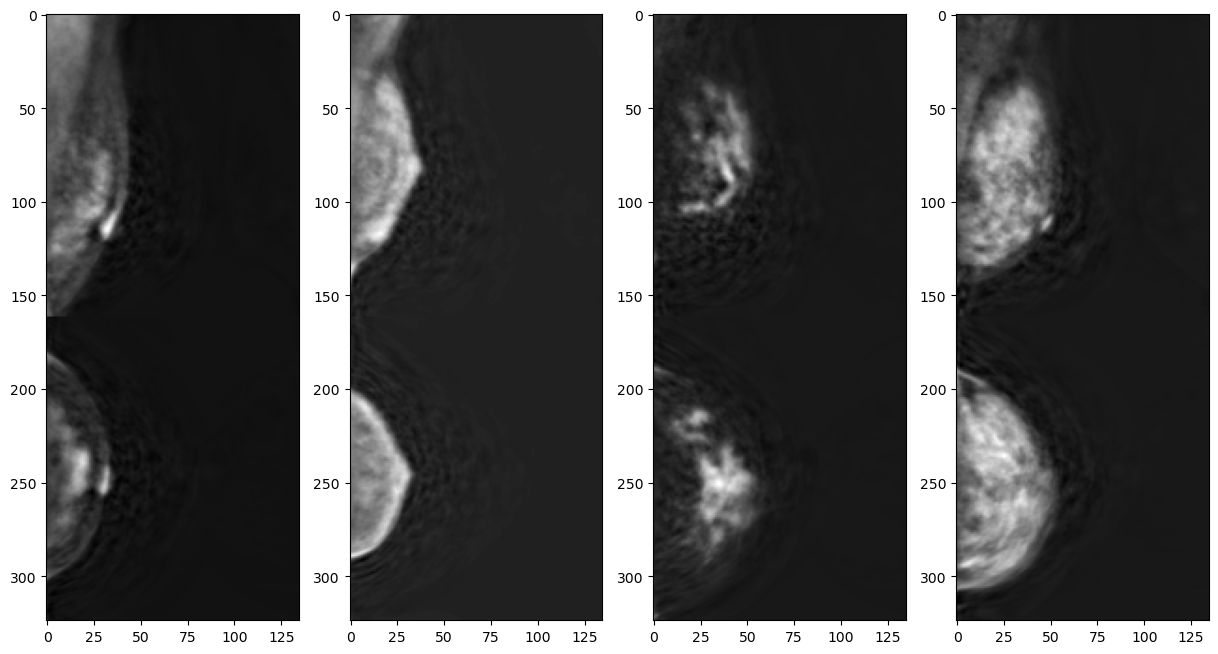

Number of Eigenvector Components: 1000


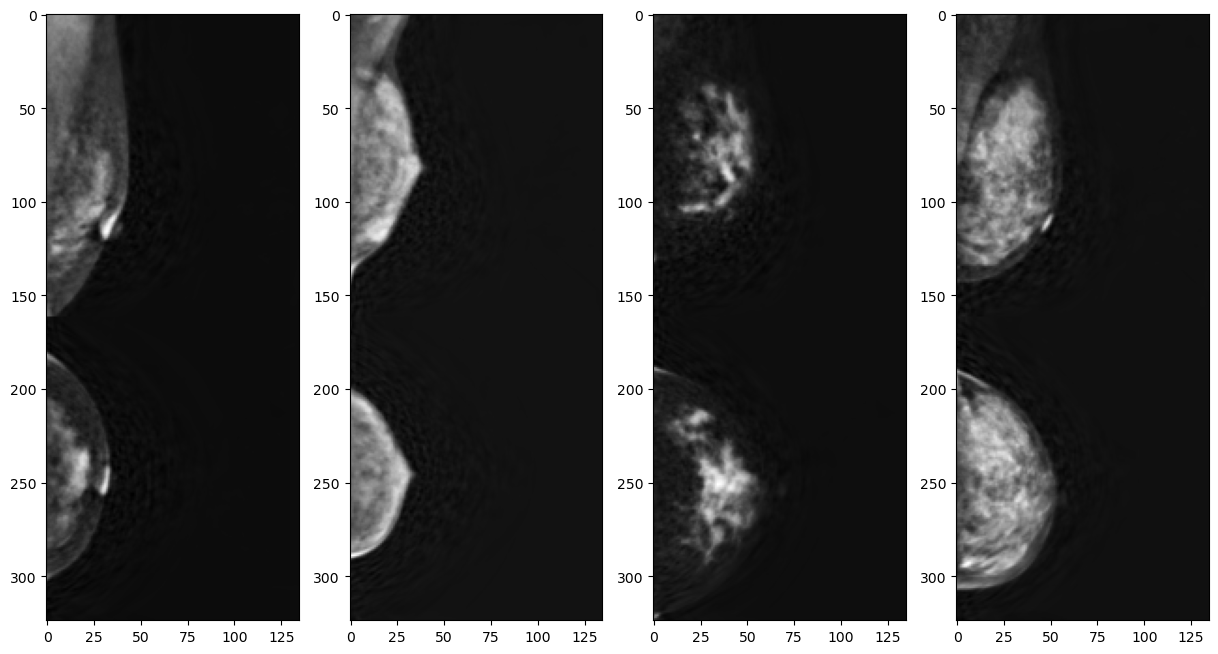

Number of Eigenvector Components: 2000


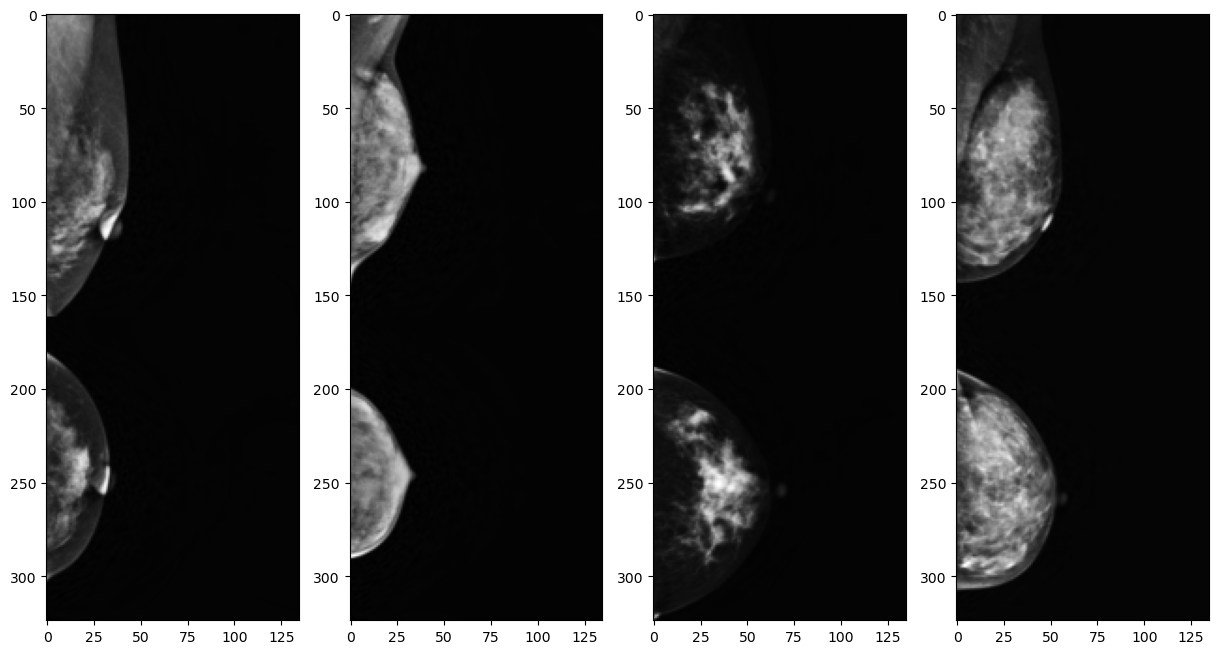

Number of Eigenvector Components: 5000


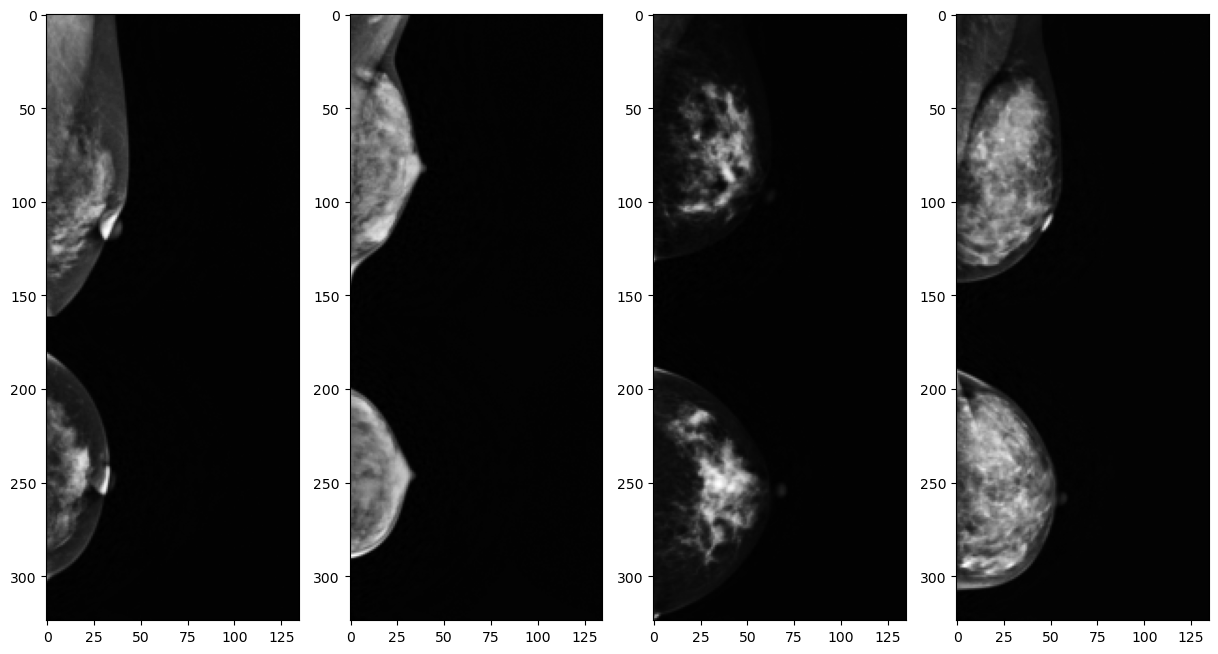

In [29]:
## Here we're just reusing the format from MP1 to print reduced dimensionality images
## Note that with the new methods for reducing dimensions speed is significantly increased
## This block is projection training images
num_comps = [100, 500, 1000, 2000, 5000]
images = train_imgs.reshape(train_imgs.shape[0], scale[0], scale[1])
idx = random.sample(range(0,train_imgs.shape[0]), 4)
four = np.array([images[idx[0]], images[idx[1]], images[idx[2]], images[idx[3]]])
plot_imgs(four.shape[0], four, suptitle='Original Images')
out = np.zeros((len(num_comps), four.shape[0], four.shape[1], four.shape[2]))

for n in range(len(num_comps)):
    for i in range(four.shape[0]):
        out[n, i, :, :] = reduce_img_dim(four[i].flatten(), vectors, num_comps[n]).reshape(scale)
    plot_imgs(four.shape[0], out[n], suptitle=f'Number of Eigenvector Components: {num_comps[n]}')

Original Images


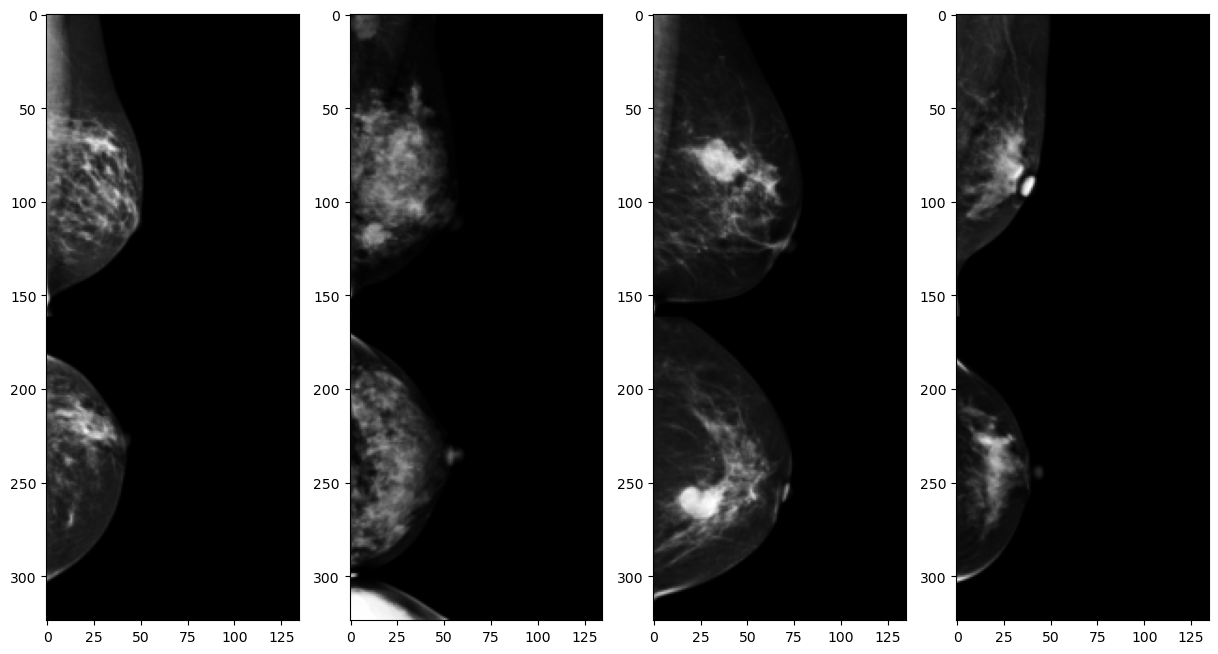

Number of Eigenvector Components: 100


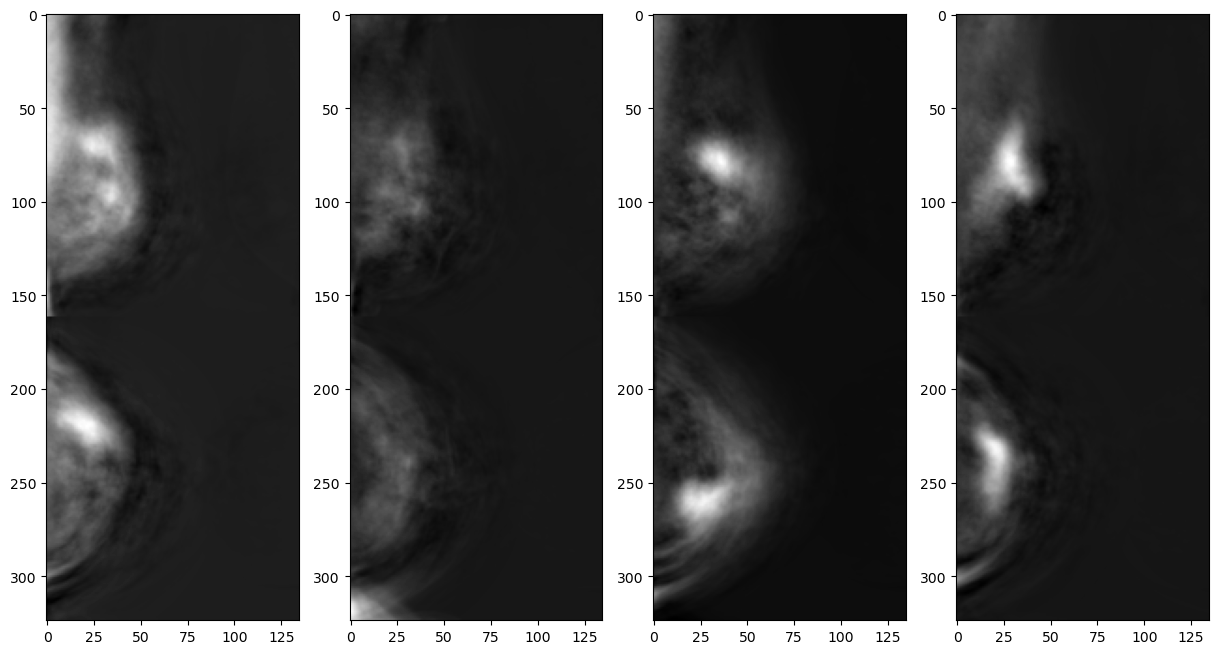

Number of Eigenvector Components: 500


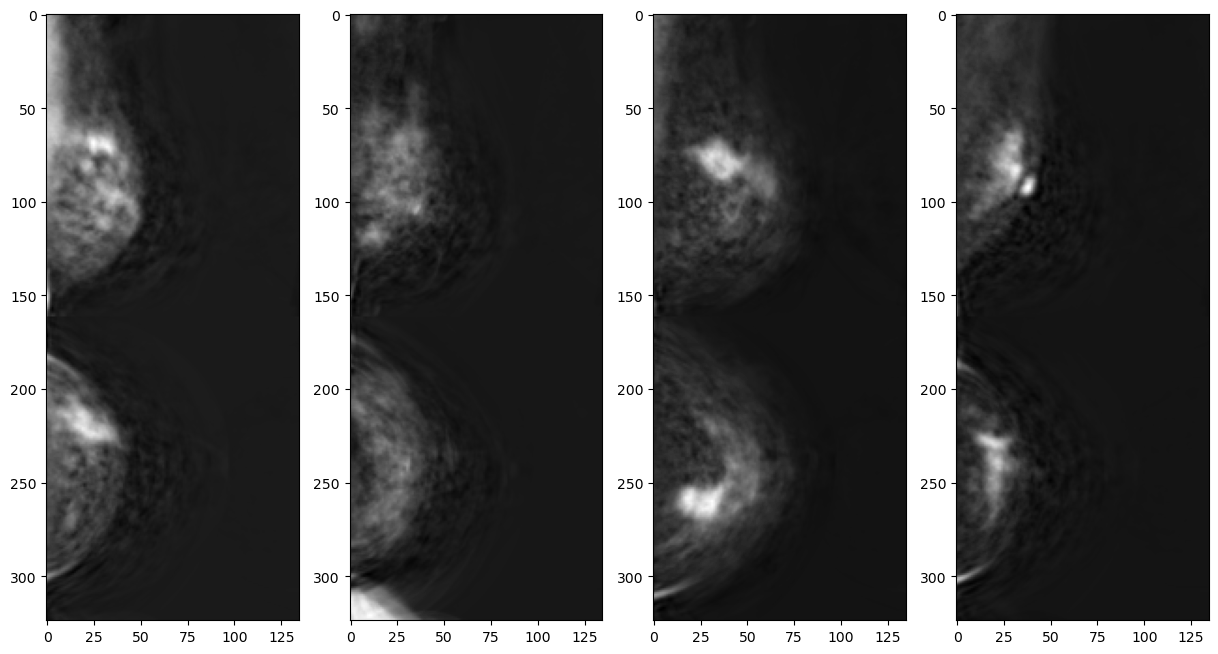

Number of Eigenvector Components: 1000


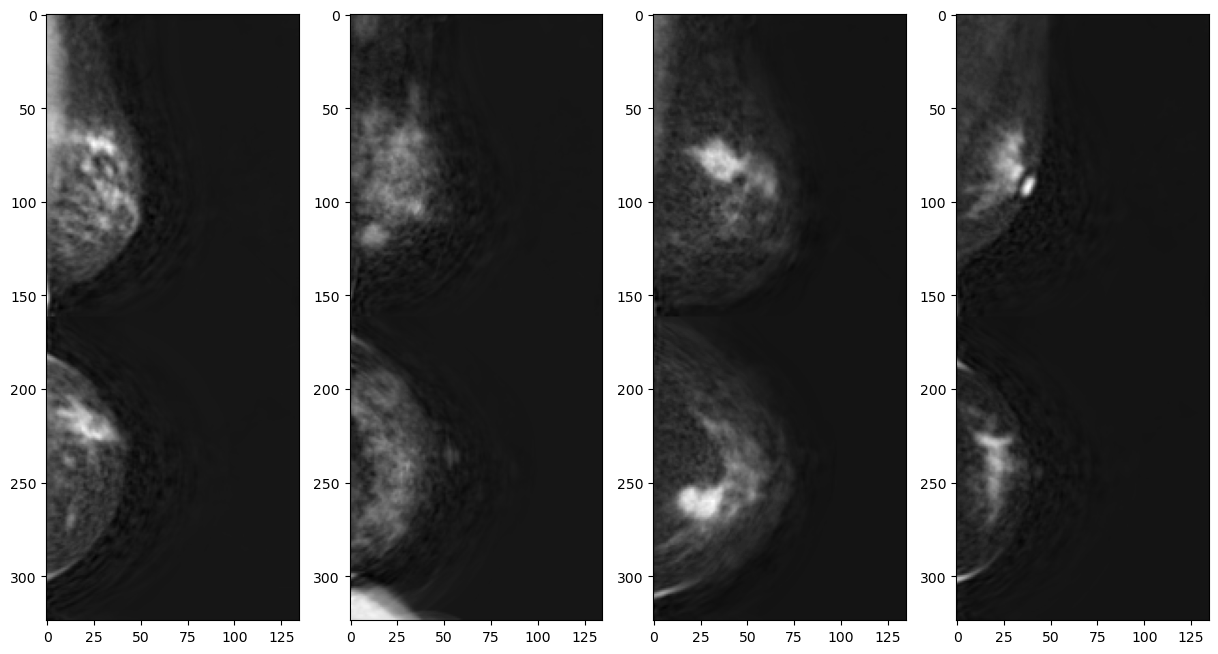

Number of Eigenvector Components: 2000


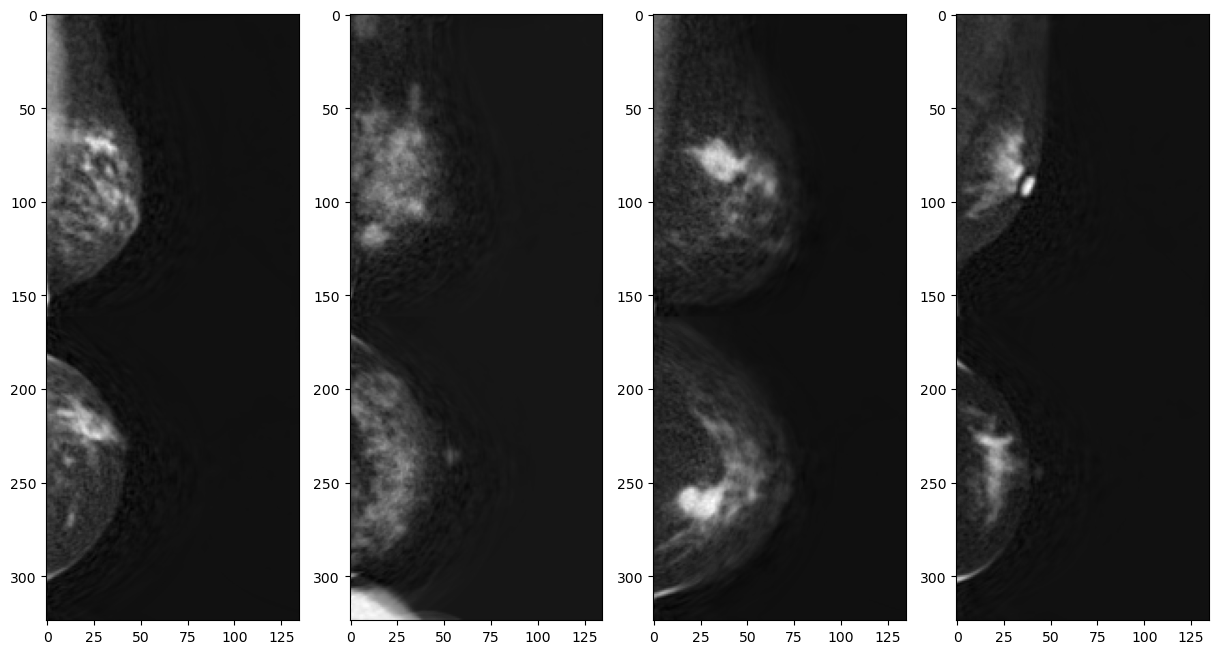

Number of Eigenvector Components: 5000


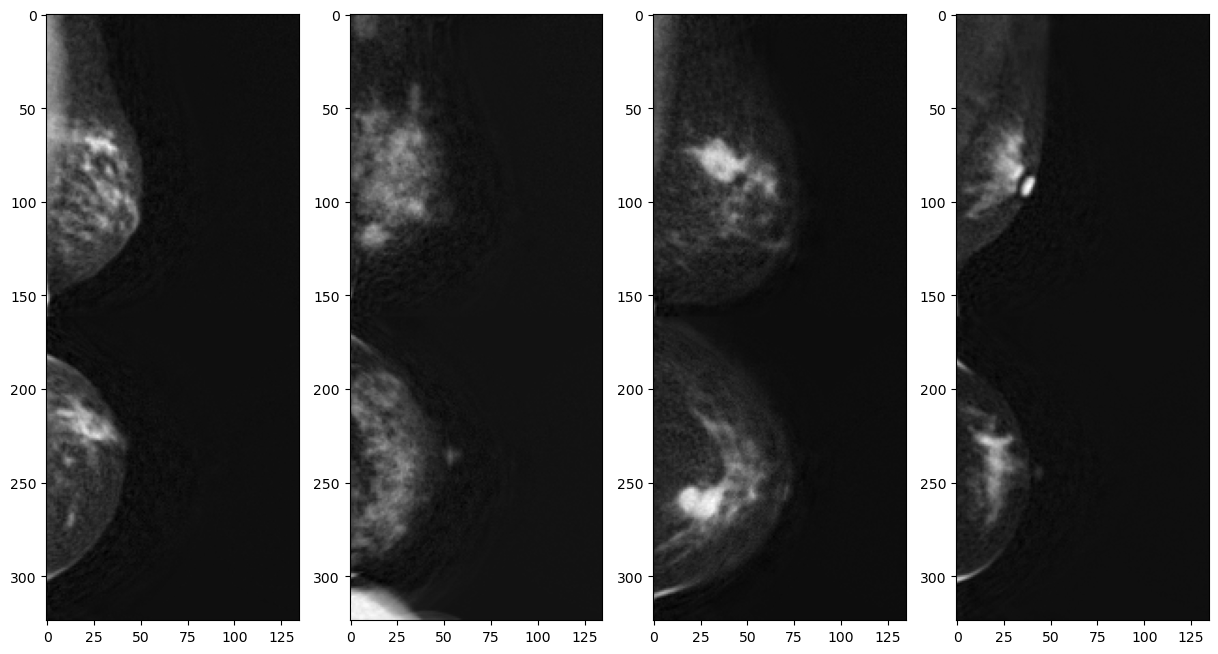

In [30]:
## This block is projection test images
num_comps = [100, 500, 1000, 2000, 5000]
images = test_imgs.reshape(test_imgs.shape[0], scale[0], scale[1])
idx = random.sample(range(0,test_imgs.shape[0]), 4)
four = np.array([images[idx[0]], images[idx[1]], images[idx[2]], images[idx[3]]])
plot_imgs(four.shape[0], four, suptitle='Original Images')
out = np.zeros((len(num_comps), four.shape[0], four.shape[1], four.shape[2]))

for n in range(len(num_comps)):
    for i in range(four.shape[0]):
        out[n, i, :, :] = reduce_img_dim(four[i].flatten(), vectors, num_comps[n]).reshape(scale)
    plot_imgs(four.shape[0], out[n], suptitle=f'Number of Eigenvector Components: {num_comps[n]}')